In [881]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [882]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [883]:
necessary_vars = ['occ_date', 'case_type_pubtrans', 'LocationCode', 'municipality', 'hate_crime', 'occ_type']

In [884]:
historical_community_safety_data_df = pd.read_csv('../../Other_Data/Historical_Community_Safety_Data.csv', usecols=necessary_vars)
print(historical_community_safety_data_df.shape)
historical_community_safety_data_df.head()

(176974, 6)


,occ_date,case_type_pubtrans,LocationCode,municipality,hate_crime,occ_type
0,2016/01/01 06:03:00+00,Impaired Alcohol / Over 80 Mgs,Outdoor,Newmarket,NaN,Impaired Operation
1,2016/01/01 06:21:59+00,Liquor - Intoxicated,Business,Markham,NaN,Provincial Offences
2,2016/01/01 06:14:59+00,Theft Under $5000 - Vehicle,Outdoor,Georgina,NaN,Theft of Motor Vehicle
3,2016/01/01 14:23:00+00,Assault with a Weapon,Business,Vaughan,Hate Crime,Assaults
4,2016/01/01 18:07:00+00,Mischief To Property,Residence,Vaughan,NaN,Mischief


In [885]:
latest_community_safety_data_df = pd.read_csv('../../Other_Data/Year_to_Date_Community_Safety_Data.csv', usecols=necessary_vars)
print(latest_community_safety_data_df.shape)
latest_community_safety_data_df.head()

(99566, 6)


,occ_date,case_type_pubtrans,LocationCode,municipality,hate_crime,occ_type
0,2021/01/01 09:00:00+00,Utter Threats To Person,NaN,Newmarket,NaN,Other Persons Crime
1,2021/01/01 09:00:00+00,Assault Peace Officer - Other,NaN,Newmarket,NaN,Assaults
2,2021/01/01 23:15:00+00,Theft Under $5000 - Shoplifting,Business,Vaughan,NaN,Theft Under $5000
3,2021/01/02 01:49:00+00,Assault,Outdoor,Vaughan,NaN,Assaults
4,2021/01/01 14:28:00+00,Impaired Alcohol / Over 80 Mgs,Outdoor,Markham,NaN,Impaired Operation


In [886]:
# Combine both historical and latest data scoures
community_safety_data_df = pd.concat([historical_community_safety_data_df, latest_community_safety_data_df]).sort_values('occ_date')
print(community_safety_data_df.shape)
community_safety_data_df.head()

(276540, 6)


,occ_date,case_type_pubtrans,LocationCode,municipality,hate_crime,occ_type
41140,2016/01/01 05:00:00+00,Public Morals,Outdoor,Whitchurch-Stouffville,NaN,Public Morals
168654,2016/01/01 05:00:00+00,Fraud - Other Means,Residence,East Gwillimbury,NaN,Fraud
170432,2016/01/01 05:00:00+00,Sexual Assault,Business,Markham,NaN,Sexual Violations
174801,2016/01/01 05:00:00+00,Other Persons Crime,Residence,East Gwillimbury,NaN,Other Persons Crime
175180,2016/01/01 05:00:00+00,Other Persons Crime,Residence,Vaughan,NaN,Other Persons Crime


In [887]:
# Convert the 'occ_date' column from timestamp format to date
community_safety_data_df['date'] = pd.to_datetime(community_safety_data_df['occ_date']).dt.date
community_safety_data_df

,occ_date,case_type_pubtrans,LocationCode,municipality,hate_crime,occ_type,date
41140,2016/01/01 05:00:00+00,Public Morals,Outdoor,Whitchurch-Stouffville,NaN,Public Morals,2016-01-01
168654,2016/01/01 05:00:00+00,Fraud - Other Means,Residence,East Gwillimbury,NaN,Fraud,2016-01-01
170432,2016/01/01 05:00:00+00,Sexual Assault,Business,Markham,NaN,Sexual Violations,2016-01-01
174801,2016/01/01 05:00:00+00,Other Persons Crime,Residence,East Gwillimbury,NaN,Other Persons Crime,2016-01-01
175180,2016/01/01 05:00:00+00,Other Persons Crime,Residence,Vaughan,NaN,Other Persons Crime,2016-01-01
...,...,...,...,...,...,...,...
99428,2023/07/01 11:28:00+00,Missing Person-Adult,Residence,Markham,NaN,Missing Person,2023-07-01
99493,2023/07/01 17:19:59+00,Possession Under - Property Obtained By Crime,Outdoor,Markham,NaN,Other Property Crime,2023-07-01
99488,2023/07/01 19:34:00+00,Impaired Alcohol / Over 80 Mgs,Outdoor,East Gwillimbury,NaN,Impaired Operation,2023-07-01
99561,2023/07/01 19:34:00+00,Impaired Operation Alcohol And Drug,Outdoor,East Gwillimbury,NaN,Impaired Operation,2023-07-01


In [888]:
# Get number of occurances each day
timeseries_data_df = community_safety_data_df.groupby('date').size().reset_index(name='num_of_crimes')
# Convert 'date' column to datetime type
timeseries_data_df['date'] = pd.to_datetime(timeseries_data_df['date'])
timeseries_data_df

,date,num_of_crimes
0,2016-01-01,270
1,2016-01-02,69
2,2016-01-03,77
3,2016-01-04,107
4,2016-01-05,94
...,...,...
2734,2023-06-27,70
2735,2023-06-28,61
2736,2023-06-29,53
2737,2023-06-30,35


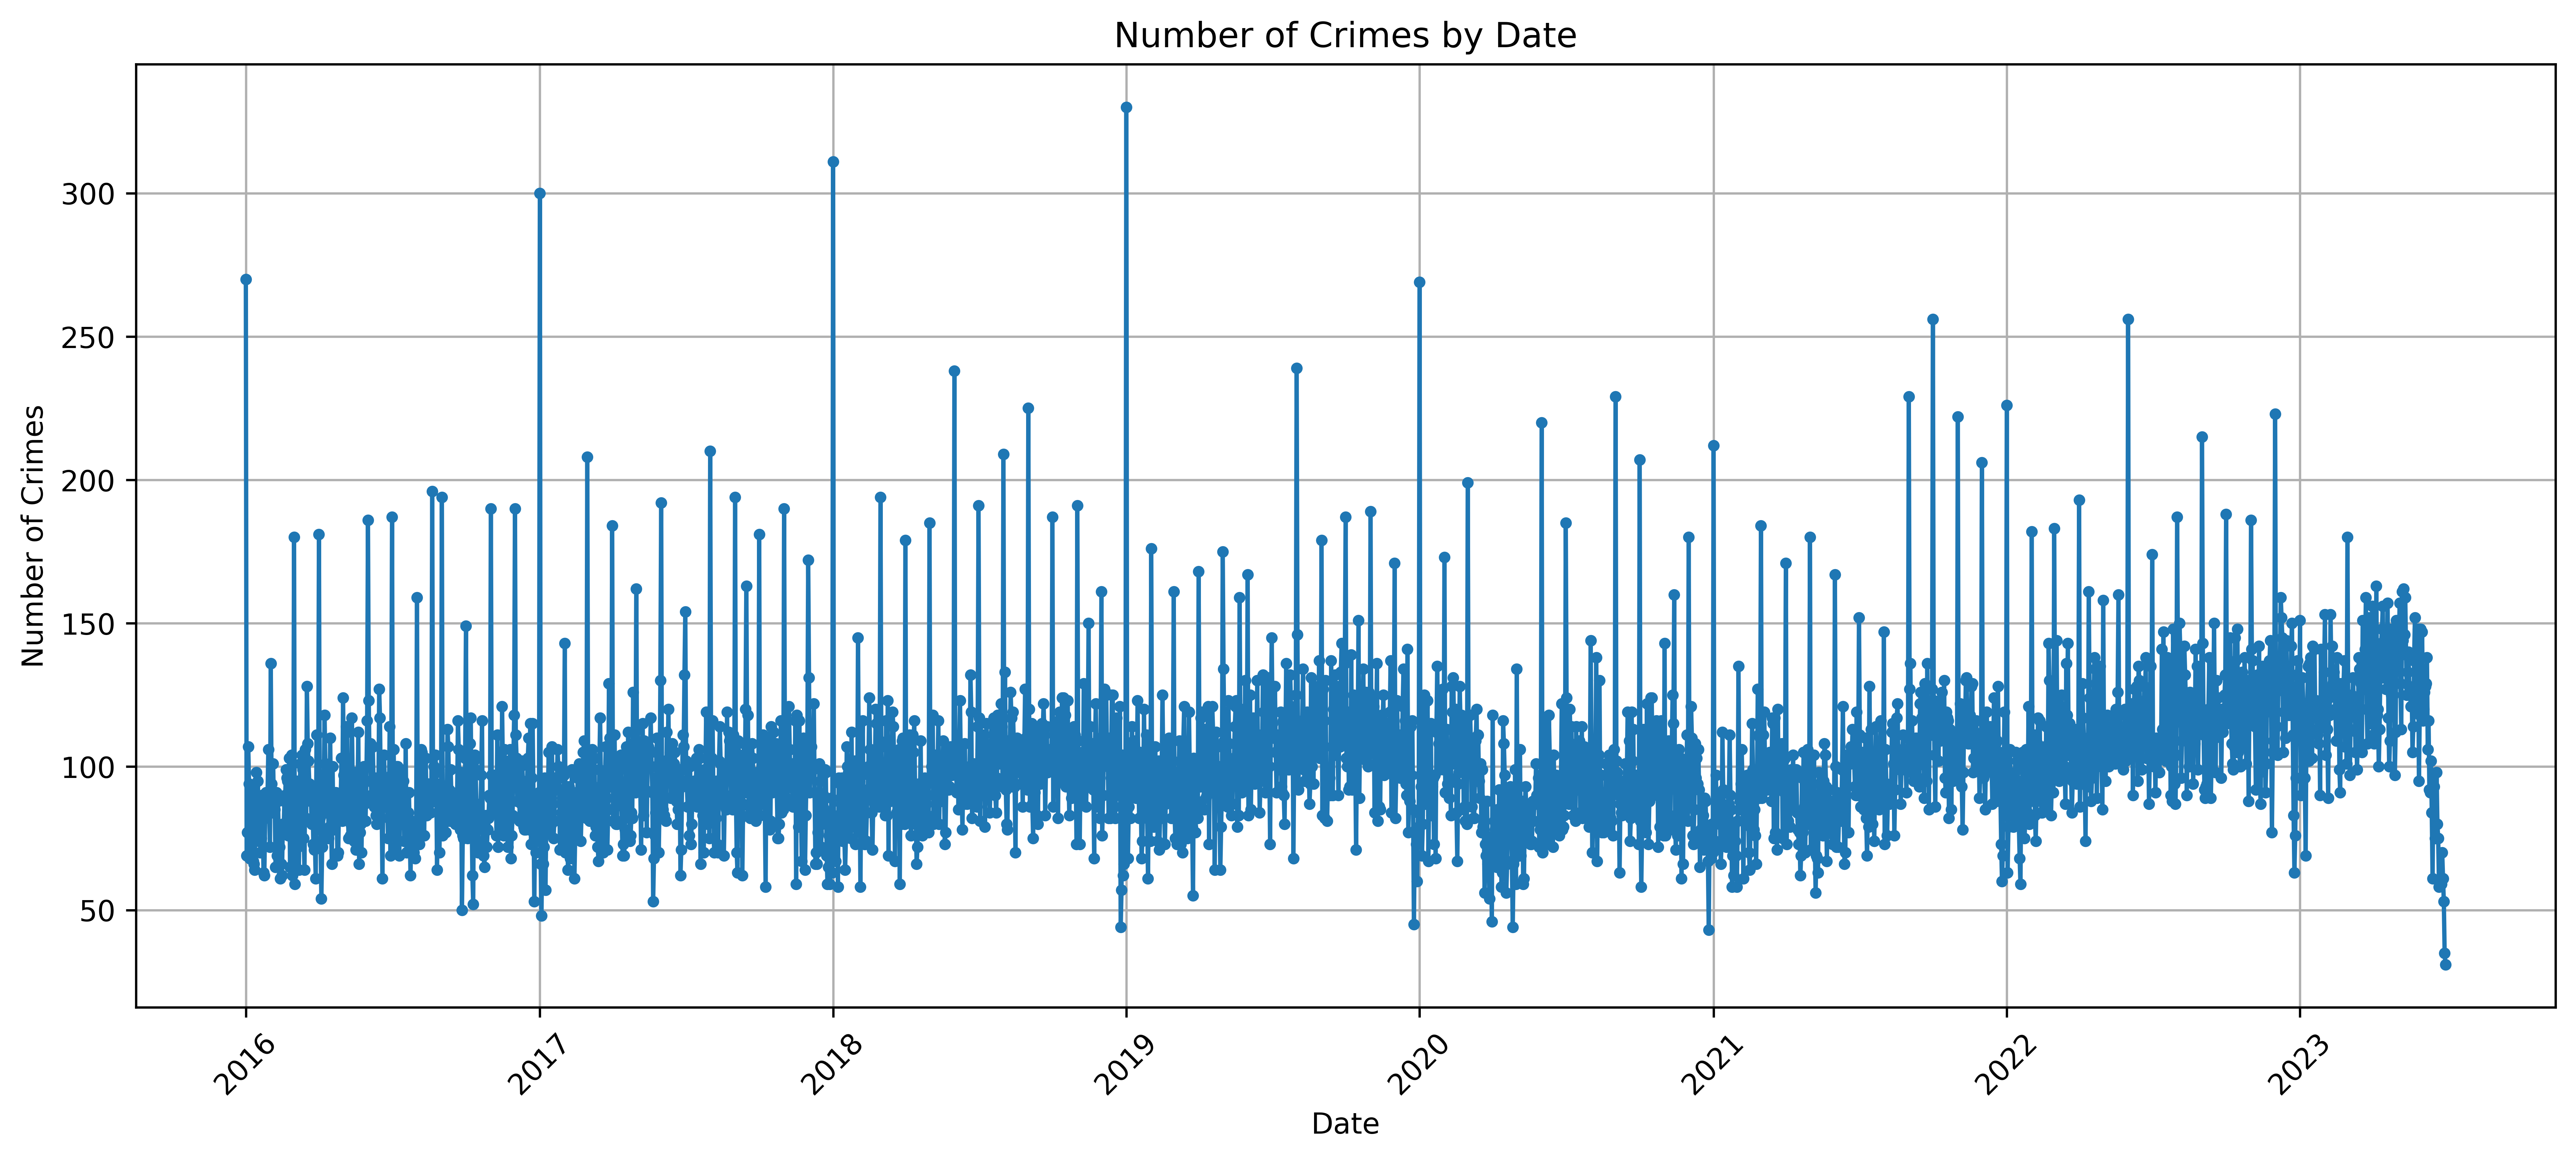

In [889]:
# Plotting
plt.figure(figsize=(15, 6))
plt.plot(timeseries_data_df['date'], timeseries_data_df['num_of_crimes'], marker='.')
plt.title('Number of Crimes by Date')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Time Series Features

In [890]:
def load_query(path):
    with open(path) as file:
        return file.read()

In [891]:
query = load_query('crime_forecast_query.sql')
feature_df = pysqldf(query)
feature_df

,date,previous_day_crimes,last_7_days_crimes,last_30_days_crimes,num_of_crimes
0,2016-01-01,270,270,270,270
1,2016-01-02,339,339,339,69
2,2016-01-03,146,416,416,77
3,2016-01-04,184,523,523,107
4,2016-01-05,201,617,617,94
...,...,...,...,...,...
2734,2023-06-27,129,461,3085,70
2735,2023-06-28,131,442,2998,61
2736,2023-06-29,114,420,2956,53
2737,2023-06-30,88,397,2873,35


In [892]:
feature_df['date'] = pd.to_datetime(feature_df.date, format='%Y-%m-%d')
feature_df

,date,previous_day_crimes,last_7_days_crimes,last_30_days_crimes,num_of_crimes
0,2016-01-01,270,270,270,270
1,2016-01-02,339,339,339,69
2,2016-01-03,146,416,416,77
3,2016-01-04,184,523,523,107
4,2016-01-05,201,617,617,94
...,...,...,...,...,...
2734,2023-06-27,129,461,3085,70
2735,2023-06-28,131,442,2998,61
2736,2023-06-29,114,420,2956,53
2737,2023-06-30,88,397,2873,35


In [893]:
# Define a function to check if a day is in a weekend
def is_weekend(weekday):
    if weekday in [5, 6]:
        return 1
    else:
        return 0

def get_season(month):
    if(month in [12, 1, 2]): # Winter
        return 4
    elif(month in [3, 4, 5]): # Spring
        return 1
    elif(month in [6, 7, 8]): # Summer
        return 2
    elif(month in [9, 10, 11]): # Fall
        return 3

def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')
    df['dayofweek'] = df['date'].dt.dayofweek

    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week
    df['weekofyear'] = df['weekofyear'].astype(int)

    df['season'] = df['month'].apply(get_season)
    df['season'] = df['season'].astype(int)

    df['is_weekend'] = df['dayofweek'].apply(is_weekend)

    X = df[['date', 'previous_day_crimes', 'last_7_days_crimes', 'last_30_days_crimes', 'dayofweek','month','year',
            'dayofmonth','weekofyear', 'is_weekend', 'season']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(feature_df, label='num_of_crimes')
features_and_target = pd.concat([X, y], axis=1)

In [894]:
features_and_target

,date,previous_day_crimes,last_7_days_crimes,last_30_days_crimes,dayofweek,month,year,dayofmonth,weekofyear,is_weekend,season,num_of_crimes
0,2016-01-01,270,270,270,4,1,2016,1,53,0,4,270
1,2016-01-02,339,339,339,5,1,2016,2,53,1,4,69
2,2016-01-03,146,416,416,6,1,2016,3,53,1,4,77
3,2016-01-04,184,523,523,0,1,2016,4,1,0,4,107
4,2016-01-05,201,617,617,1,1,2016,5,1,0,4,94
...,...,...,...,...,...,...,...,...,...,...,...,...
2734,2023-06-27,129,461,3085,1,6,2023,27,26,0,2,70
2735,2023-06-28,131,442,2998,2,6,2023,28,26,0,2,61
2736,2023-06-29,114,420,2956,3,6,2023,29,26,0,2,53
2737,2023-06-30,88,397,2873,4,6,2023,30,26,0,2,35


In [895]:
features_and_target.corr()

,previous_day_crimes,last_7_days_crimes,last_30_days_crimes,dayofweek,month,year,dayofmonth,weekofyear,is_weekend,season,num_of_crimes
previous_day_crimes,1.000000,0.682558,0.530924,0.057295,0.102891,0.338432,-0.259556,0.103593,-0.047942,-0.015130,0.786687
last_7_days_crimes,0.682558,1.000000,0.786520,-0.003369,0.174090,0.494852,-0.271918,0.143321,-0.002734,-0.027166,0.528499
last_30_days_crimes,0.530924,0.786520,1.000000,0.013839,0.281303,0.592391,0.018857,0.252322,0.001182,-0.050057,0.414320
dayofweek,0.057295,-0.003369,0.013839,1.000000,0.001539,-0.000487,-0.002783,0.001975,0.790432,0.003470,-0.047886
month,0.102891,0.174090,0.281303,0.001539,1.000000,-0.098830,0.010551,0.969991,-0.000066,0.179251,0.078103
year,0.338432,0.494852,0.592391,-0.000487,-0.098830,1.000000,-0.003217,-0.097071,-0.000573,-0.035478,0.264974
dayofmonth,-0.259556,-0.271918,0.018857,-0.002783,0.010551,-0.003217,1.000000,0.067167,-0.001419,-0.012671,-0.214840
weekofyear,0.103593,0.143321,0.252322,0.001975,0.969991,-0.097071,0.067167,1.000000,0.001663,0.194670,0.086413
is_weekend,-0.047942,-0.002734,0.001182,0.790432,-0.000066,-0.000573,-0.001419,0.001663,1.000000,0.004429,-0.139268
season,-0.015130,-0.027166,-0.050057,0.003470,0.179251,-0.035478,-0.012671,0.194670,0.004429,1.000000,-0.012595


In [896]:
features_and_target.columns

Index(['date', 'previous_day_crimes', 'last_7_days_crimes',
       'last_30_days_crimes', 'dayofweek', 'month', 'year', 'dayofmonth',
       'weekofyear', 'is_weekend', 'season', 'num_of_crimes'],
      dtype='object')

# ML Analysis

In [897]:
features = ['previous_day_crimes', 'last_7_days_crimes', 'last_30_days_crimes', 'dayofweek',
       'month', 'dayofmonth', 'weekofyear', 'is_weekend', 'season']
label = 'num_of_crimes'
test_df = features_and_target[features_and_target['date'] >= '2021-06-01']
train_df = features_and_target[features_and_target['date'] < '2021-06-01']
X_train, y_train = train_df[features], train_df[label]
X_test, y_test = test_df[features], test_df[label]

In [898]:
# Get rows with null values
feature_df[feature_df.isnull().any(axis=1)]

,date,previous_day_crimes,last_7_days_crimes,last_30_days_crimes,num_of_crimes,dayofweek,month,year,dayofmonth,weekofyear,season,is_weekend


In [899]:
# from xgboost import XGBRegressor
# model = XGBRegressor(n_estimators=700, learning_rate=0.01)
# model.fit(X_train, 
#         y_train,
#         eval_set=[(X_train, y_train), (X_test, y_test)],
#         eval_metric='mae')

from sklearn.ensemble import RandomForestRegressor
# Train the model
# model = RandomForestRegressor(n_estimators=1000, max_depth=11)
model = RandomForestRegressor(max_features=0.6946169328587748, max_leaf_nodes=8937,
                      n_estimators=960, max_depth=11, n_jobs=-1, random_state=12032022)
model.fit(X_train, y_train)



RandomForestRegressor(max_depth=11, max_features=0.6946169328587748,
                      max_leaf_nodes=8937, n_estimators=960, n_jobs=-1,
                      random_state=12032022)

# Feature Importance

In [900]:
# Get the feature importances
importances = model.feature_importances_
# Create a DataFrame for the feature importance table
feature_importance_table = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
# Sort the table by feature importance (descending order)
feature_importance_table = feature_importance_table.sort_values(by='Importance', ascending=False)
feature_importance_table

,Feature,Importance
5,dayofmonth,0.444461
0,previous_day_crimes,0.382063
1,last_7_days_crimes,0.061225
2,last_30_days_crimes,0.035472
4,month,0.028283
6,weekofyear,0.022405
3,dayofweek,0.016943
7,is_weekend,0.004824
8,season,0.004323


# Testing prediction

In [901]:
predictions = model.predict(X_test)
test_df = test_df.reset_index().drop('index', axis=1)
test_df['y_pred'] = pd.Series(predictions)


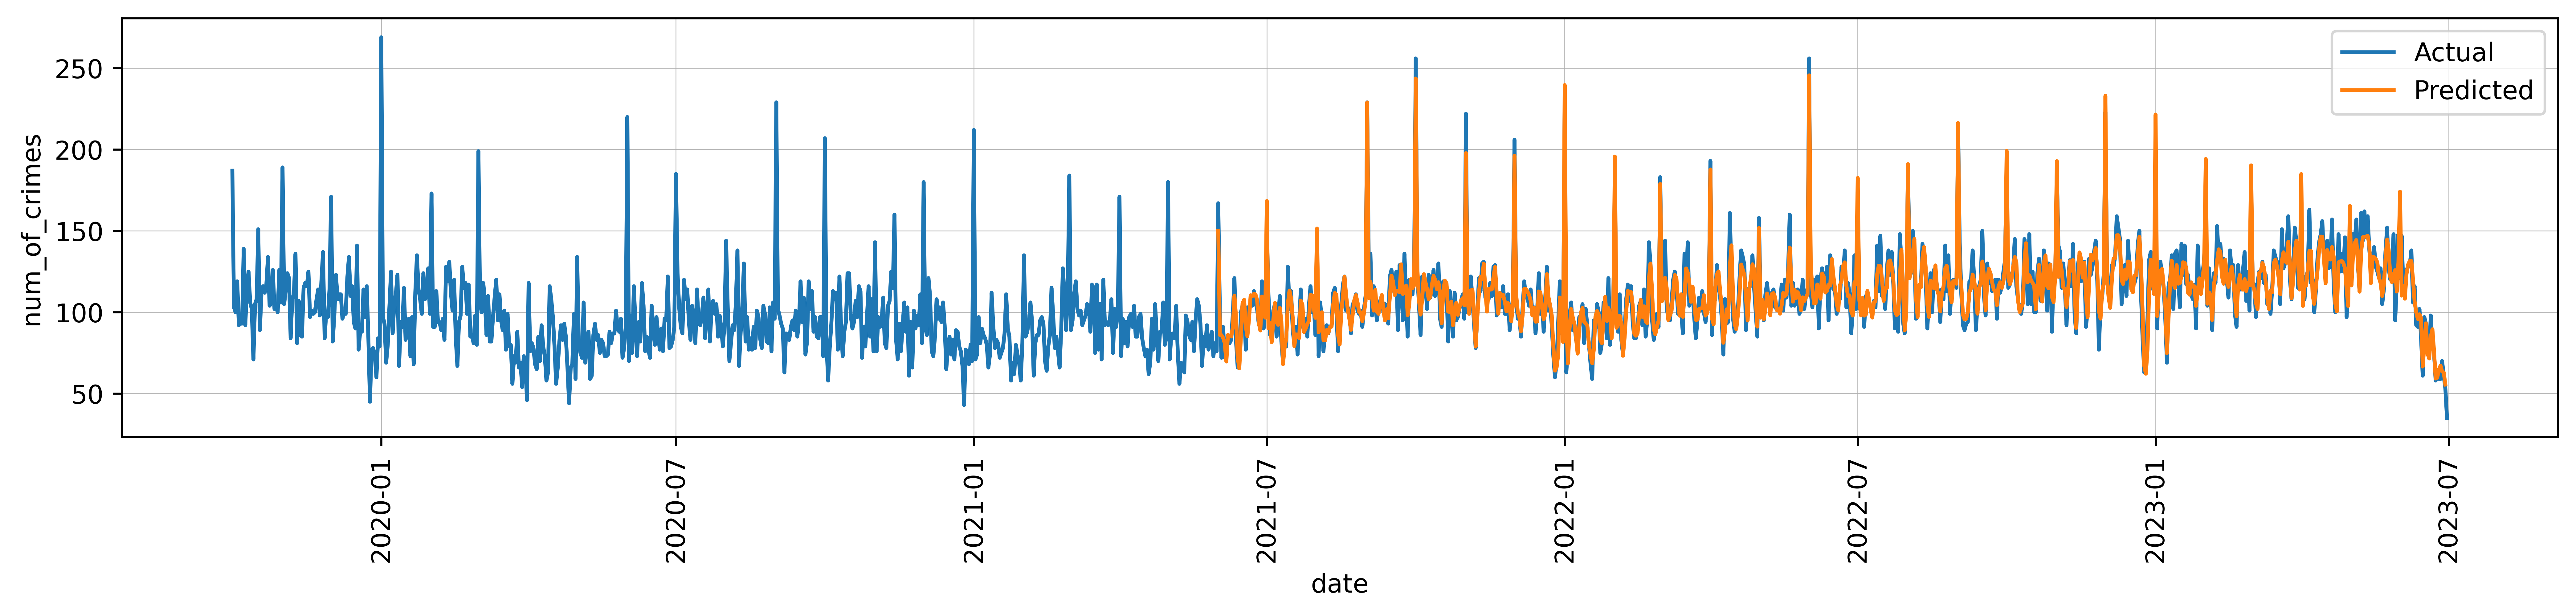

In [902]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':600})
fig, ax = plt.subplots()
sns.lineplot(data=features_and_target[len(features_and_target)//2 : len(features_and_target)-1], x='date', y='num_of_crimes', label='Actual')
sns.lineplot(data=test_df[: len(test_df)-2], x='date', y='y_pred', label='Predicted')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [903]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(test_df['num_of_crimes'], test_df['y_pred'])
rmse = mean_squared_error(test_df['num_of_crimes'], test_df['y_pred'], squared=False)
r2 = r2_score(test_df['num_of_crimes'], test_df['y_pred'])
print("MAE:", mae, "RMSE:", rmse, "R-Squared:", r2)

MAE: 8.09243688930537 RMSE: 10.865918935264313 R-Squared: 0.8065425057618699


In [904]:
model

RandomForestRegressor(max_depth=11, max_features=0.6946169328587748,
                      max_leaf_nodes=8937, n_estimators=960, n_jobs=-1,
                      random_state=12032022)

In [905]:
# RandomForestRegressor() Test RMSE: 17.086254559591584 Test R-Squared: 0.5216493353410171
# RandomForestRegressor(max_depth=10, n_estimators=1000) Test RMSE: 16.941454400917255 Test R-Squared: 0.5297226965628126
# RandomForestRegressor(max_features=0.6946169328587748, max_leaf_nodes=8937, n_estimators=960, n_jobs=-1, random_state=12032022) Test RMSE: 16.814360906030366 Test R-Squared: 0.5367521986020076

# AutoML Hyper-parameter tuning
* Run the following code for Auto ML Model Tuning

In [906]:
# from flaml import AutoML
# automl = AutoML()
# automl.fit(X_train, y_train, task="regression")

In [907]:
# print(automl.best_estimator, automl.best_config)